### Installing and importing the libraries

In [8]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /anaconda3/lib/python3.6/site-packages (0.21.3)


In [1]:
import sklearn

import pandas as pd
import numpy as np

import datetime

In [2]:
print(sklearn.__version__)

0.22.1


In [3]:
print(np.__version__)

1.18.1


In [4]:
print(pd.__version__)

1.0.1


### Loading dataset

### Auto-mpg dataset
Source: https://www.kaggle.com/uciml/autompg-dataset

In [5]:
automobile_df = pd.read_csv('datasets/cars.csv')

automobile_df.head(5)

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
0,chevrolet chevelle malibu,18.0,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan",3.47,2.68,9
1,buick skylark 320,15.0,8,350,165,3693,11.5,1970,US],3.47,2.68,?
2,plymouth satellite,18.0,?,318,150,3436,11,"1970, 1976",US,2.68,3.47,9
3,amc rebel sst,16.0,8,304,150,3433,12,1970,US,3.19,3.40,10
4,ford torino,17.0,8,302,140,3449,10.5,1970-1972,US],3.19,3.40,8


In [6]:
automobile_df.shape

(394, 12)

#### Replace the '?'  value with NaN values

In [7]:
automobile_df = automobile_df.replace('?', np.nan)

automobile_df.head(5)

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
0,chevrolet chevelle malibu,18.0,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan",3.47,2.68,9
1,buick skylark 320,15.0,8,350,165,3693,11.5,1970,US],3.47,2.68,NaN
2,plymouth satellite,18.0,NaN,318,150,3436,11,"1970, 1976",US,2.68,3.47,9
3,amc rebel sst,16.0,8,304,150,3433,12,1970,US,3.19,3.40,10
4,ford torino,17.0,8,302,140,3449,10.5,1970-1972,US],3.19,3.40,8


In [8]:
automobile_df.isna().sum()

Model                0
MPG                  9
Cylinders            2
Displacement         1
Horsepower           0
Weight               1
Acceleration         1
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    2
dtype: int64

In [9]:
automobile_df['MPG'] = automobile_df['MPG'].fillna(automobile_df['MPG'].mean())

automobile_df.isna().sum()

Model                0
MPG                  0
Cylinders            2
Displacement         1
Horsepower           0
Weight               1
Acceleration         1
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    2
dtype: int64

In [11]:
automobile_df = automobile_df.dropna()

In [12]:
automobile_df.shape

(387, 12)

In [20]:
automobile_df.isnull().sum()

Model                0
MPG                  0
Cylinders            0
Displacement         0
Horsepower           0
Weight               0
Acceleration         0
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    0
dtype: int64

In [13]:
automobile_df.drop(['Model'], axis=1, inplace=True)

In [14]:
automobile_df.sample(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
303,28.4,4,151,90,2670,16,1979,US,3.13,3.40,8.3
211,13.0,8,350,145,4055,12,1976,US,3.19,3.40,9
116,29.0,4,68,49,1867,19.5,1973,Europe,3.70,3.52,21
280,22.3,4,140,88,2890,17.3,1979,US,3.62,3.15,7.5
126,15.0,6,250,100,3336,17,"1974, 1975",US,3.74,2.90,9.5


In [15]:
automobile_df.drop(['bore', 'stroke', 'compression-ratio'], inplace=True, axis=1)

automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,18.000000,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan"
3,16.000000,8,304,150,3433,12,1970,US
4,17.000000,8,302,140,3449,10.5,1970-1972,US]
6,14.000000,8,454,220,4354,9,1970[1975],"US; Detroit, Michigan"
7,23.551429,8,440,215,4312,8.5,1970,US


In [16]:
automobile_df['Year'].str.isnumeric().value_counts()

True     351
False     36
Name: Year, dtype: int64

In [17]:
automobile_df['Year'].loc[automobile_df['Year'].str.isnumeric() == False]

0          1970[1975]
4           1970-1972
6          1970[1975]
30      1971[1973]971
35         1971[1973]
40         1971[1973]
44         1971[1973]
49         1971[1973]
56         1972[1973]
61         1972[1973]
65         1972[1973]
68         1972[1973]
73         1972[1973]
75            1972-73
79            1972-73
82            1972-73
96          1973-1974
97         1973, 1974
102    1973, 19741973
105        1973, 1974
108        1973, 1974
112        1973, 1974
115        1973, 1974
126        1974, 1975
131        1974, 1975
134        1974, 1975
137        1974, 1975
139    1974, 19751974
142        1974, 1975
365         1982-1985
374         1982-1985
380         1982-1985
383         1982-1985
387         1982-1985
389         1982-1985
391         1982-1985
Name: Year, dtype: object

In [18]:
extr = automobile_df['Year'].str.extract(r'^(\d{4})', expand=False)

extr.head()

0    1970
3    1970
4    1970
6    1970
7    1970
Name: Year, dtype: object

In [19]:
automobile_df['Year'].isnull().values.any()

False

In [20]:
automobile_df['Year'] = pd.to_numeric(extr)
automobile_df['Year'].dtype

dtype('int64')

In [21]:
automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,18.000000,8,307,130,3504,12,1970,"US; Detroit, Michigan"
3,16.000000,8,304,150,3433,12,1970,US
4,17.000000,8,302,140,3449,10.5,1970,US]
6,14.000000,8,454,220,4354,9,1970,"US; Detroit, Michigan"
7,23.551429,8,440,215,4312,8.5,1970,US


#### Add an age column

In [22]:
automobile_df['Age'] = datetime.datetime.now().year - automobile_df['Year']

automobile_df.drop(['Year'], axis=1, inplace=True)

automobile_df.sample(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
294,27.4,4,121,80,2670,15,US,41
44,18.0,6,258,110,2962,13.5,US,49
372,37.0,4,91,68,2025,18.2,Japan,38
160,15.0,6,258,110,3730,19,US,45
4,17.0,8,302,140,3449,10.5,US],50


In [23]:
automobile_df.dtypes

MPG             float64
Cylinders        object
Displacement     object
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [24]:
automobile_df['Cylinders'].isnull().values.any()

False

In [25]:
automobile_df['Cylinders'].str.isnumeric().value_counts()

True     378
False      9
Name: Cylinders, dtype: int64

In [26]:
automobile_df['Cylinders'].loc[automobile_df['Cylinders'].str.isnumeric() == False]

11    -
22    -
32    -
42    -
51    -
58    -
69    -
82    -
89    -
Name: Cylinders, dtype: object

In [27]:
cylinders = automobile_df['Cylinders'].loc[automobile_df['Cylinders'] != '-']

cmean = cylinders.astype(int).mean()

In [28]:
automobile_df['Cylinders'] = automobile_df['Cylinders'].replace('-', cmean).astype(int)

In [29]:
automobile_df.dtypes

MPG             float64
Cylinders         int64
Displacement     object
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [30]:
automobile_df['Displacement'] = pd.to_numeric(automobile_df['Displacement'], errors='coerce')

automobile_df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [31]:
automobile_df['Weight'] = pd.to_numeric(automobile_df['Weight'], errors='coerce')

automobile_df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration     object
Origin           object
Age               int64
dtype: object

In [32]:
automobile_df['Acceleration'] = pd.to_numeric(automobile_df['Acceleration'], errors='coerce')

automobile_df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration    float64
Origin           object
Age               int64
dtype: object

In [33]:
automobile_df['Origin'].head(15)

0     US; Detroit, Michigan
3                        US
4                       US]
6     US; Detroit, Michigan
7                        US
8                        US
9                       US]
10                       US
11                       US
12    US; Detroit, Michigan
13                       US
14             Japan; Aichi
15                       US
16                      US]
17                       US
Name: Origin, dtype: object

In [35]:
automobile_df['Origin'].unique()

array(['US; Detroit, Michigan', 'US', 'US]', 'Japan; Aichi',
       'Europe-Germany', 'Europe', 'Japan; Tokyo', 'Japan; Aichi]',
       'US; Detroit, Michigan]', 'Japan; Tokyo]', 'Japan',
       'Europe Germany'], dtype=object)

In [36]:
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('US'), 
                                   'US', 
                                   automobile_df['Origin'])

automobile_df['Origin'].unique()

array(['US', 'Japan; Aichi', 'Europe-Germany', 'Europe', 'Japan; Tokyo',
       'Japan; Aichi]', 'Japan; Tokyo]', 'Japan', 'Europe Germany'],
      dtype=object)

In [37]:
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('Japan'), 
                                   'Japan',
                                   automobile_df['Origin'])

automobile_df['Origin'].unique()

array(['US', 'Japan', 'Europe-Germany', 'Europe', 'Europe Germany'],
      dtype=object)

In [38]:
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('Europe'), 
                                   'Europe', 
                                   automobile_df['Origin'])

automobile_df['Origin'].unique()

array(['US', 'Japan', 'Europe'], dtype=object)

#### Describe the data

In [39]:
automobile_df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,23.672514,5.410853,192.184755,103.645995,2965.387597,15.573643,43.917313
std,7.736579,1.667795,103.703706,38.128651,846.332848,2.746260,3.668715
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,38.000000
25%,17.600000,4.000000,102.500000,75.000000,2221.500000,13.900000,41.000000
50%,23.200000,4.000000,146.000000,92.000000,2790.000000,15.500000,44.000000
75%,29.000000,6.000000,260.000000,121.000000,3589.500000,17.050000,47.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,50.000000


In [40]:
automobile_df.to_csv('datasets/cars_processed.csv', index=False)

In [41]:
!ls datasets

GoSales_Tx_LogisticRegression.csv cars_processed.csv
auto-mpg.csv                      diabetes.csv
auto_mpg_processed.csv            diabetes_processed.csv
cars.csv                          diabetes_processed_incomplete.csv


### Visualizing relationships

In [42]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Miles per gallon')

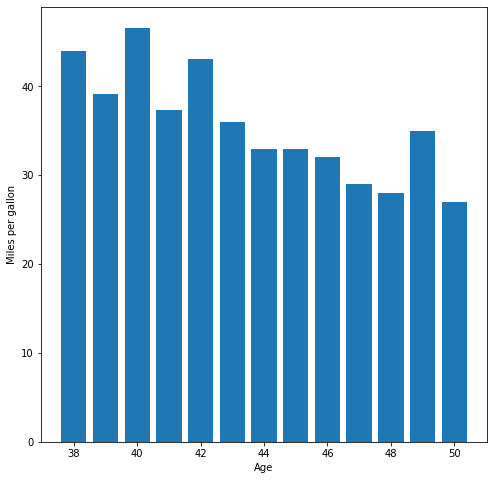

In [43]:
plt.figure(figsize=(8, 8))

plt.bar(automobile_df['Age'], automobile_df['MPG'])

plt.xlabel('Age')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

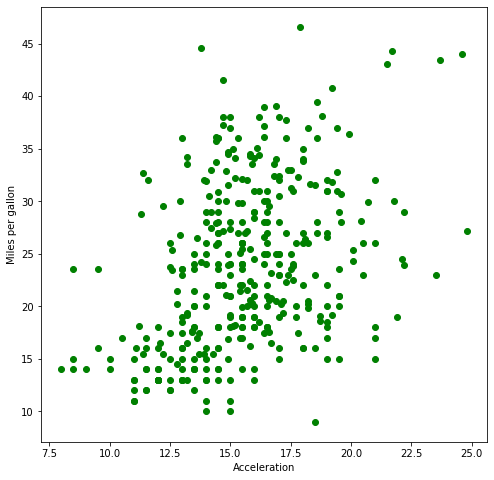

In [44]:
plt.figure(figsize=(8, 8))

plt.scatter(automobile_df['Acceleration'], automobile_df['MPG'], color='g')

plt.xlabel('Acceleration')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

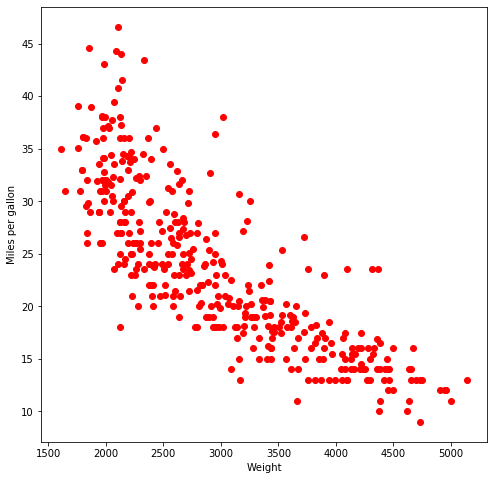

In [45]:
plt.figure(figsize=(8, 8))

plt.scatter(automobile_df['Weight'], automobile_df['MPG'], color='r')

plt.xlabel('Weight')
plt.ylabel('Miles per gallon')

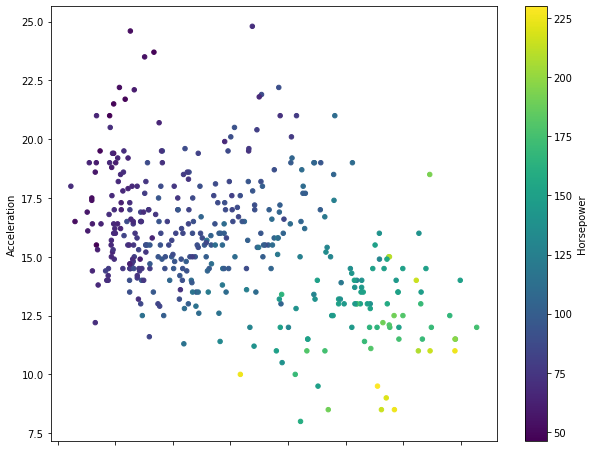

In [46]:
automobile_df.plot.scatter(x='Weight',
                           y='Acceleration',
                           c='Horsepower',
                           colormap='viridis',
                           figsize=(10, 8));

Text(0, 0.5, 'Miles per gallon')

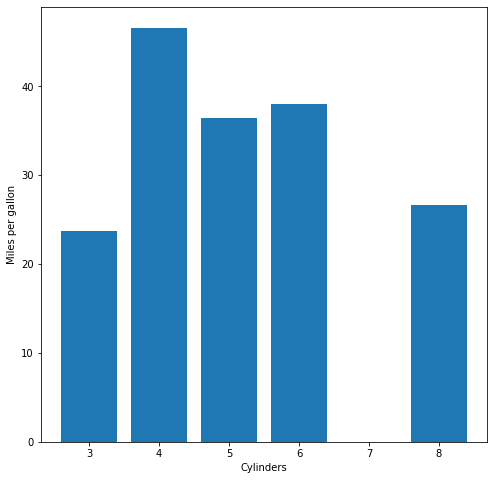

In [47]:
plt.figure(figsize=(8, 8))

plt.bar(automobile_df['Cylinders'], automobile_df['MPG'])

plt.xlabel('Cylinders')
plt.ylabel('Miles per gallon')

#### Histogram

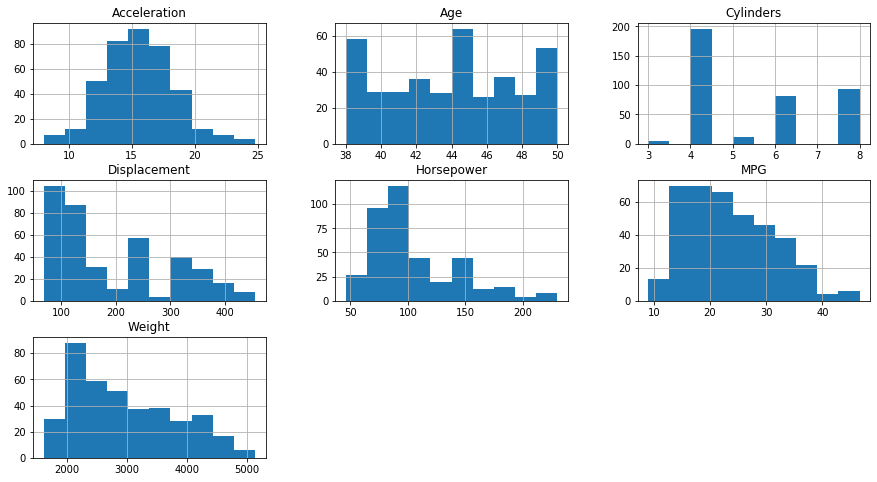

In [48]:
automobile_df.hist(figsize=(15, 8))
plt.show()

##### Next we will use KDE plot and Boxplot so we are dropping cylinders column as these plots can not be use for categorical data.

In [49]:
automobile_df.drop(['Cylinders', 'Origin'], axis=1, inplace=True)

automobile_df.sample(10)

,MPG,Displacement,Horsepower,Weight,Acceleration,Age
168,23.0,140.0,78,2592,18.5,45
147,24.0,120.0,97,2489,15.0,46
235,30.5,98.0,63,2051,17.0,43
269,23.2,156.0,105,2745,16.7,42
370,23.0,151.0,92,3035,20.5,38
378,34.0,108.0,70,2245,16.9,38
260,19.2,305.0,145,3425,13.2,42
145,24.0,90.0,75,2108,15.5,46
135,13.0,350.0,150,4699,14.5,46
212,13.0,302.0,130,3870,15.0,44


#### Plotting Density estimation plot

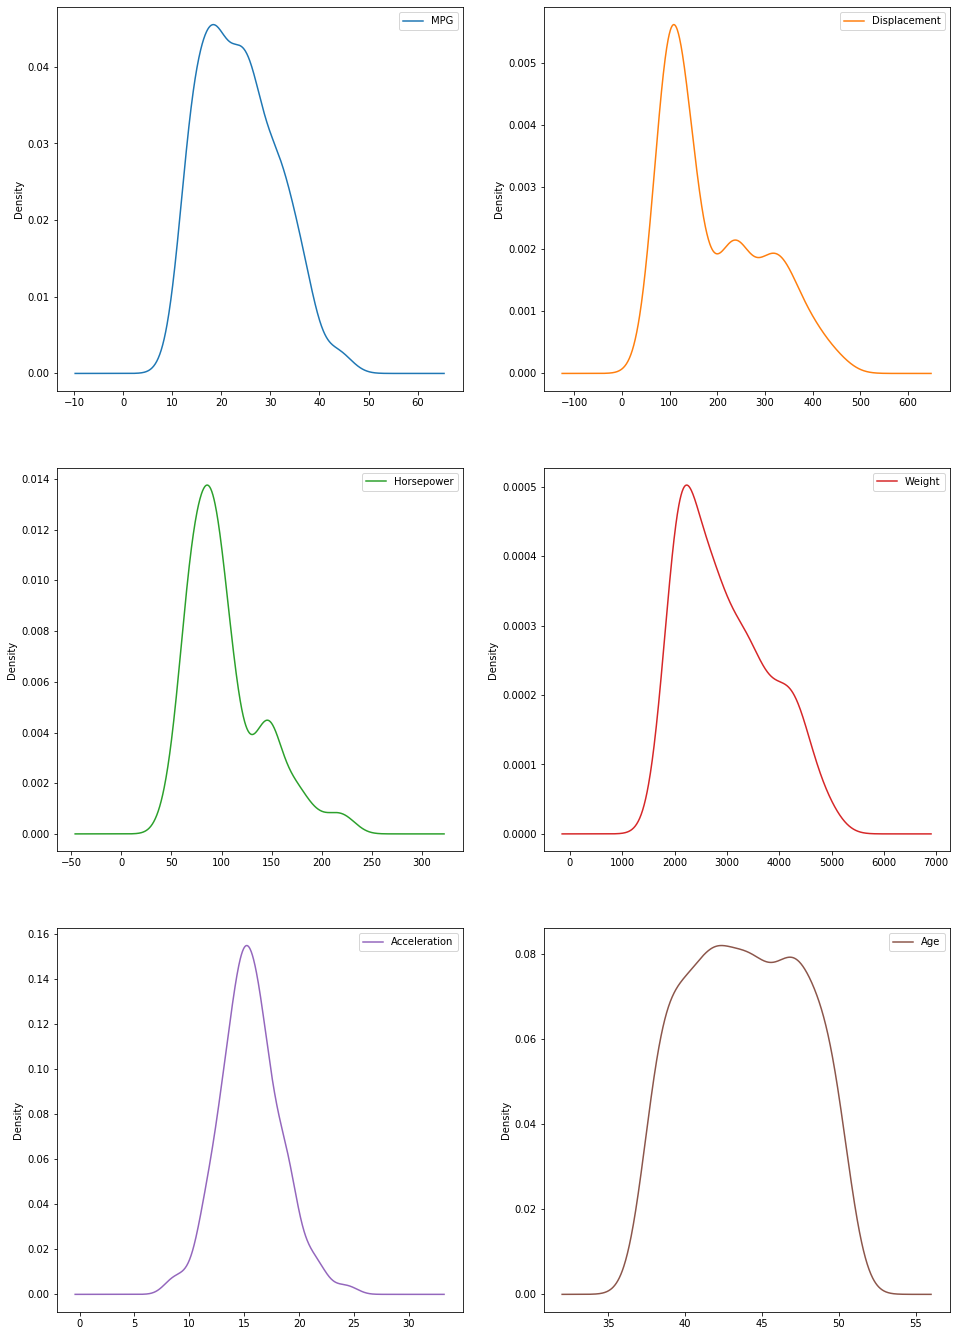

In [50]:
automobile_df.plot(kind='density', 
                   subplots=True, 
                   layout=(3, 2), 
                   sharex=False, 
                   figsize=(16, 24))

plt.show()

#### Plotting Box plot

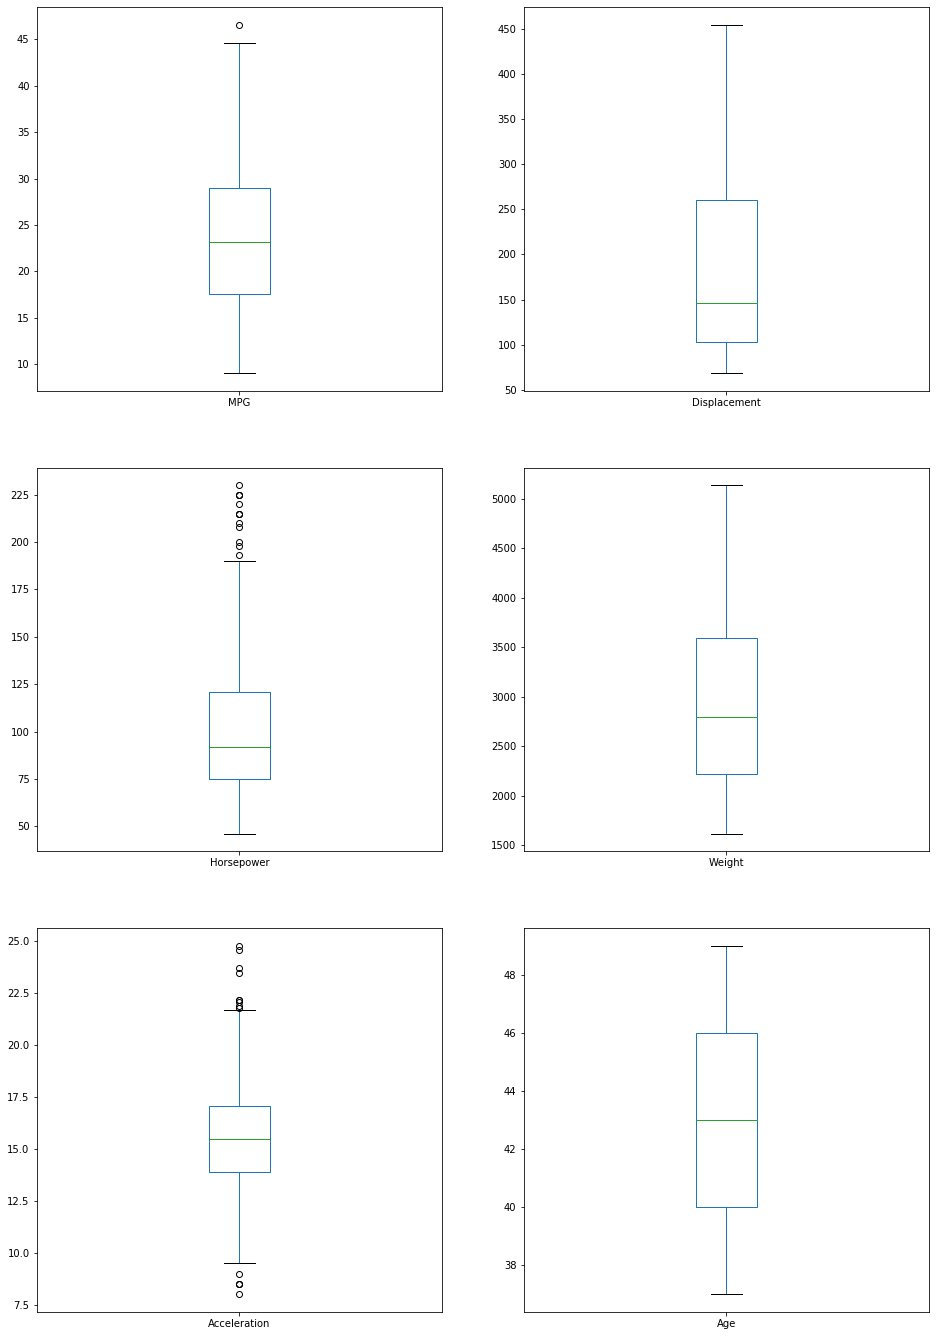

In [58]:
automobile_df.plot(kind='box', 
                   subplots=True, 
                   layout=(3, 2), 
                   sharex=False, 
                   figsize=(16, 24))

plt.show()

In [51]:
cars_corr = automobile_df.corr()

cars_corr

,MPG,Displacement,Horsepower,Weight,Acceleration,Age
MPG,1.000000,-0.788492,-0.761499,-0.820138,0.392186,-0.566242
Displacement,-0.788492,1.000000,0.894199,0.932822,-0.526901,0.357047
Horsepower,-0.761499,0.894199,1.000000,0.863388,-0.670920,0.404458
Weight,-0.820138,0.932822,0.863388,1.000000,-0.397181,0.299049
Acceleration,0.392186,-0.526901,-0.670920,-0.397181,1.000000,-0.292705
Age,-0.566242,0.357047,0.404458,0.299049,-0.292705,1.000000


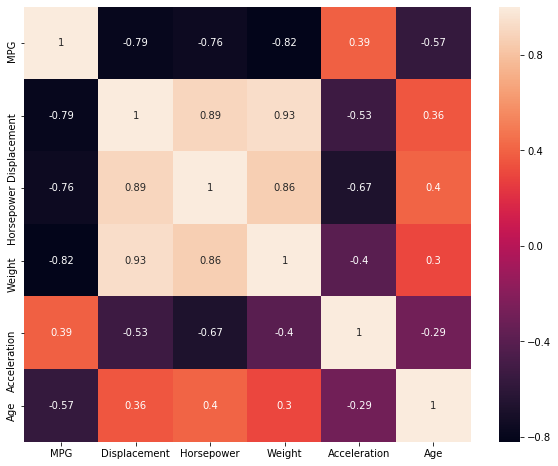

In [60]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (10, 8))

sns.heatmap(cars_corr, annot = True)